In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 讀入Tensorflow

In [3]:
class_names = ['T-shirt/top',  # 0
               'Trouser',      # 1
               'Pullover',     # 2
               'Dress',        # 3
               'Coat',         # 4
               'Sandal',       # 5
               'Shirt',        # 6
               'Sneaker',      # 7
               'Bag',          # 8
               'Ankle boot']   # 9

In [4]:
import tensorflow as tf

## 1.讀入MNSIT 數據集

In [5]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

In [7]:

print(len(y_train))
print(len(y_test))

60000
10000


## 2.資料整理

In [8]:
x_train = x_train.reshape(60000,28,28,1) / 255
x_test = x_test.reshape(10000,28,28,1)/ 255  #如果是彩色的用3

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 3.打造神經網路

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

In [12]:
from tensorflow.keras.optimizers import SGD

In [13]:
model = Sequential()  #開一台函數學習機

In [14]:
model.add(Conv2D(16, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Conv2D(32, (3,3), padding='same',
                activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Conv2D(64, (3,3), padding='same',
               activation='relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Dense(128, activation = 'relu'))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(10, activation='softmax')) #輸出時加起來要是1

In [23]:
result = model.predict_classes(x_test)

In [24]:
model.compile(loss='mse', optimizer=SGD(lr=0.05),  #發現learning rate很重要
              metrics=['accuracy'])  #可以改loss function

Instructions for updating:
Use tf.cast instead.


In [25]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 28s 468us/sample - loss: 0.0898 - acc: 0.0841
Epoch 2/20
60000/60000 [==============================] - 28s 461us/sample - loss: 0.0894 - acc: 0.1489
Epoch 3/20
60000/60000 [==============================] - 27s 456us/sample - loss: 0.0888 - acc: 0.2141
Epoch 4/20
60000/60000 [==============================] - 28s 471us/sample - loss: 0.0869 - acc: 0.2647
Epoch 5/20
60000/60000 [==============================] - 27s 458us/sample - loss: 0.0734 - acc: 0.4224
Epoch 6/20
60000/60000 [==============================] - 27s 458us/sample - loss: 0.0472 - acc: 0.6557
Epoch 7/20
60000/60000 [==============================] - 27s 458us/sample - loss: 0.0417 - acc: 0.6949
Epoch 8/20
60000/60000 [==============================] - 27s 458us/sample - loss: 0.0390 - acc: 0.7181
Epoch 9/20
60000/60000 [==============================] - 28s 467us/sample - loss: 0.0368 - acc: 0.7351
Epoch 10/20
6000

In [26]:
score = model.evaluate(x_test, y_test)  #發現準確率略低一點點

10000/10000 [==============================] - 2s 164us/sample - loss: 0.0274 - acc: 0.8091


### 小小成果

In [27]:
result = model.predict_classes(x_test)

In [28]:
class_names[result[9487]]

'Coat'

Text(0.5, 1.0, 'Coat')

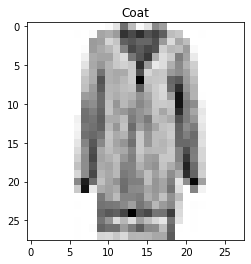

In [34]:
plt.imshow(x_test[9487].reshape(28,28), cmap='Greys')
plt.title(class_names[result[9487]])

### NOTE：修改了哪些地方？


* 增加Dense中的units
* 調低learning rate : 發現lr很重要，很大程度影響正確率
* 調低batch_size
* 調高epochs
* 有嘗試調整過層數，但不知道為什麼跑～很～久～　就只用３層了